<a href="https://colab.research.google.com/github/Naufalfz27/RevoU_Vi/blob/main/VIP_Telkom_x_RevoU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import gdown

In [ ]:
url = "https://drive.google.com/file/d/1x0M-BeF_dNu-wlwlQLkzz1oGzd2iA_0x/view?usp=sharing"
output = "database.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1x0M-BeF_dNu-wlwlQLkzz1oGzd2iA_0x
To: /content/database.csv
100%|██████████| 10.6M/10.6M [00:00<00:00, 34.7MB/s]


'database.csv'

In [ ]:
url = "https://drive.google.com/file/d/1h27m0KPkOFs59NiPl6uUwZUf-IGNxvOF/view?usp=sharing"
output = "user.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1h27m0KPkOFs59NiPl6uUwZUf-IGNxvOF
To: /content/user.csv
100%|██████████| 962/962 [00:00<00:00, 1.81MB/s]


'user.csv'

In [ ]:
# Load database.csv and save as database.pkl
df_database = pd.read_csv('database.csv')
df_database.to_pickle('database.pkl')
print("database.csv converted to database.pkl")

database.csv converted to database.pkl


/tmp/ipython-input-691496900.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_database = pd.read_csv('database.csv')


In [ ]:
# Load user.csv and save as user.pkl
df_user = pd.read_csv('user.csv')
df_user.to_pickle('user.pkl')
print("user.csv converted to user.pkl")

user.csv converted to user.pkl


In [ ]:
df_user.info()
df_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            20 non-null     object
 1   user_name          20 non-null     object
 2   field_of_business  20 non-null     object
 3   join_date          20 non-null     object
dtypes: object(4)
memory usage: 772.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122749 entries, 0 to 122748
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   transaction_id  122749 non-null  object
 1   user_id         122749 non-null  object
 2   channel         122749 non-null  object
 3   message_type    50000 non-null   object
 4   status          122749 non-null  object
 5   is_charge       122749 non-null  bool  
 6   quantity        122749 non-null  int64 
 7   unit_price      122749 non-null  int64 
 8   reven

In [ ]:
df_database.head()

,transaction_id,user_id,channel,message_type,status,is_charge,quantity,unit_price,revenue,created_at
0,6819609cde80fc0012abe3e1,user_1,WhatsApp,marketing,delivered,True,1,400,400,2025-02-14 09:27:00
1,6838cb9a9eb51800120d7e4b,user_1,WhatsApp,marketing,delivered,True,1,400,400,2025-01-02 16:21:00
2,683925b91e1cd70012699e41,user_1,WhatsApp,marketing,delivered,True,1,400,400,2025-03-18 09:20:00
3,683c38a39eb518001215aeb6,user_1,WhatsApp,service,delivered,True,1,150,150,2025-02-19 16:06:00
4,683d1a2af7e736001227ad9c,user_1,WhatsApp,utility,delivered,True,1,200,200,2025-02-03 14:02:00


In [ ]:
df_database[df_database.duplicated()]

,transaction_id,user_id,channel,message_type,status,is_charge,quantity,unit_price,revenue,created_at


In [ ]:
df_database = df_database.drop_duplicates(subset=['transaction_id'], keep='last').reset_index(drop=True)
df_database = df_database.set_index('transaction_id', verify_integrity=True)

In [ ]:
df_database[['revenue']].describe()

,revenue
count,122748.000000
mean,211.379167
std,276.840262
min,0.000000
25%,50.000000
50%,150.000000
75%,400.000000
max,10680.000000


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

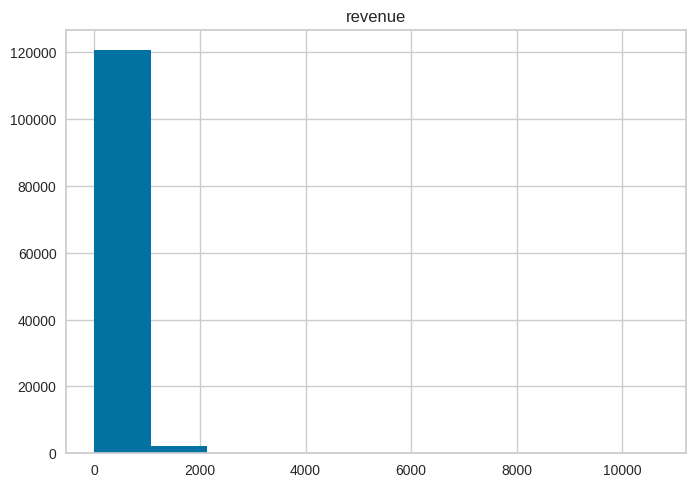

In [ ]:
df_database[['revenue']].hist(bins=10)

<Axes: >

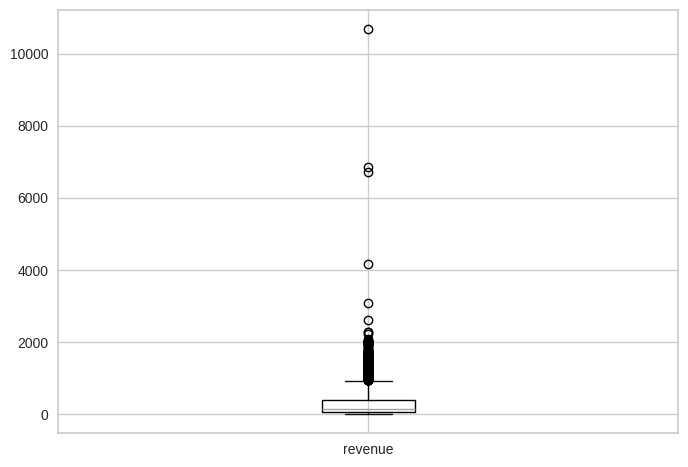

In [ ]:
df_database[['revenue']].boxplot()

In [ ]:
# make sure datetime is correct
df_database["created_at"] = pd.to_datetime(df_database["created_at"])

# snapshot date = 1 day after last transaction
snapshot_date = df_database["created_at"].max() + pd.Timedelta(days=1)

In [ ]:
rfm = df_database.groupby("user_id").agg(
    Recency=("created_at", lambda x: (snapshot_date - x.max()).days),
    Frequency=("created_at", "count"),   # count rows since transaction_id is index
    Monetary=("revenue", "sum")
).reset_index()


In [ ]:
rfm.head(60)

,user_id,Recency,Frequency,Monetary
0,user_1,1,24496,5125530
1,user_10,1,1525,323700
2,user_11,1,1559,340730
3,user_12,1,1487,300770
4,user_13,1,1530,335960
5,user_14,1,1523,305880
6,user_15,1,1488,318840
7,user_16,1,1593,339010
8,user_17,1,1510,315770
9,user_18,1,1573,344080


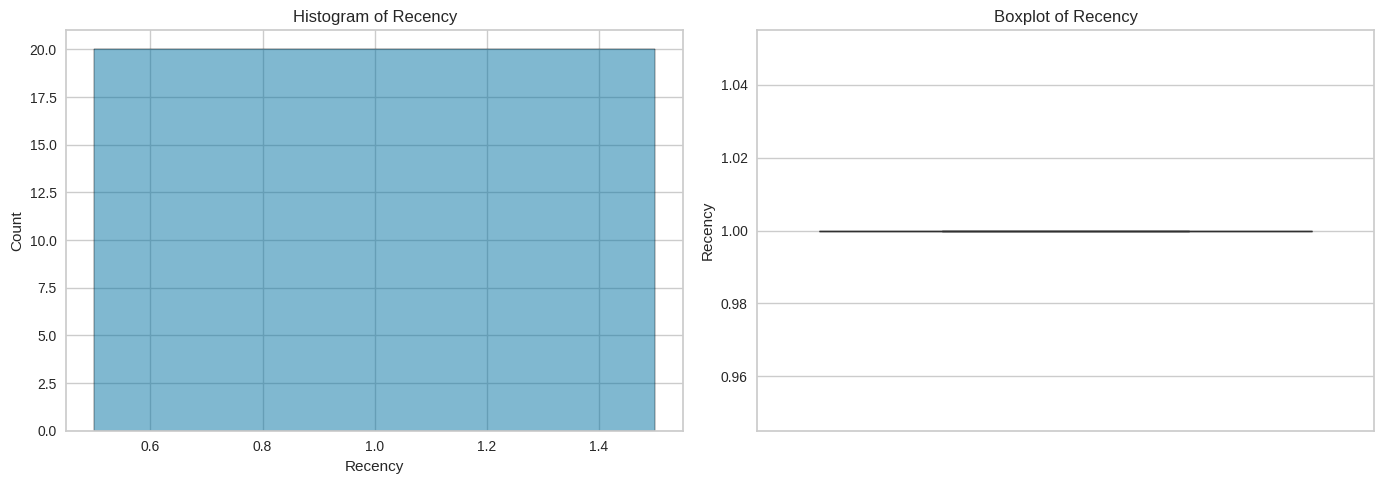

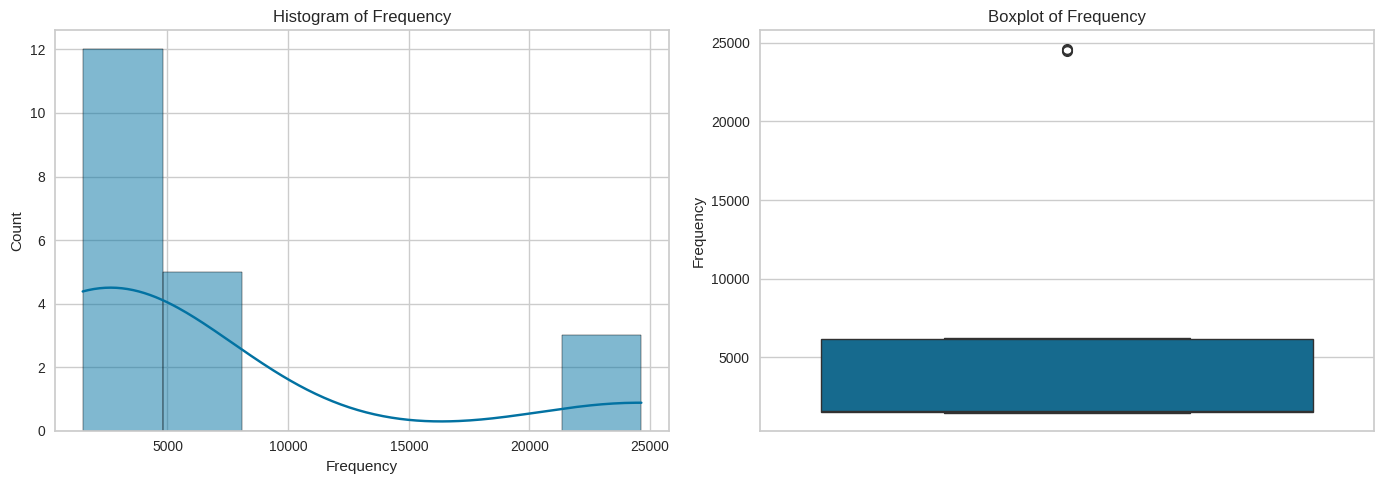

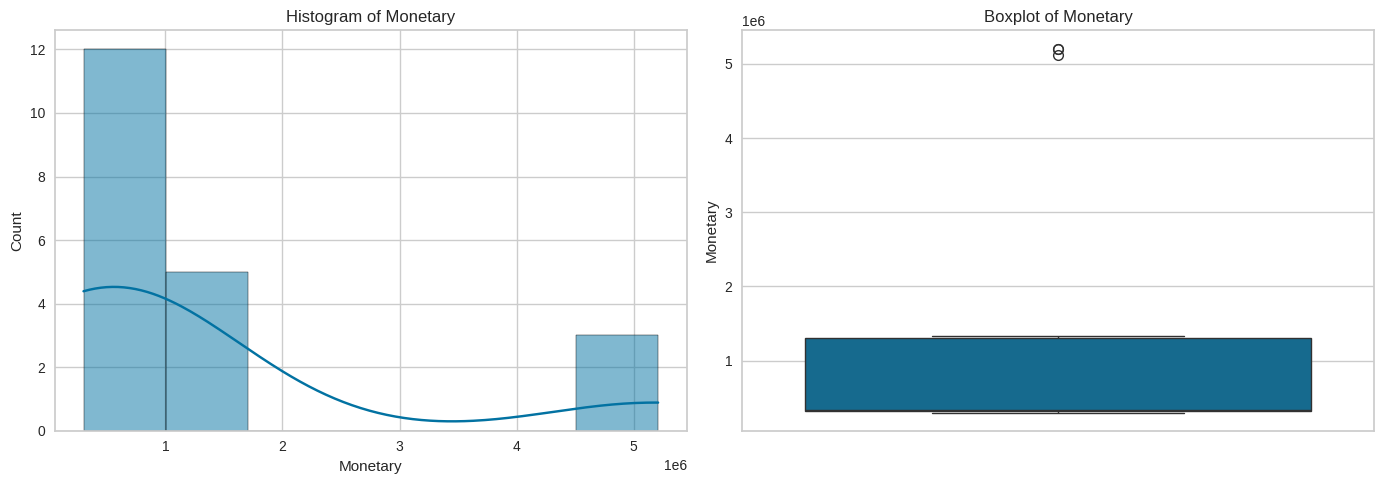

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['Recency', 'Frequency', 'Monetary']

for col in columns_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(rfm[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # Boxplot
    sns.boxplot(y=rfm[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

In [ ]:
rfm["Frequency_log"] = np.log1p(rfm["Frequency"])
rfm["Monetary_log"] = np.log1p(rfm["Monetary"])


In [ ]:
scaler = RobustScaler()

X = scaler.fit_transform(
    rfm[["Recency", "Frequency_log", "Monetary_log"]]
)

In [ ]:
pd.DataFrame(X, columns=["R", "F", "M"]).describe()


,R,F,M
count,20.0,20.000000,20.000000
mean,0.0,0.532076,0.512963
std,0.0,0.754896,0.753343
min,0.0,-0.037101,-0.091125
25%,0.0,-0.019247,-0.041104
50%,0.0,0.000000,0.000000
75%,0.0,0.980753,0.958896
max,0.0,1.976284,1.955582


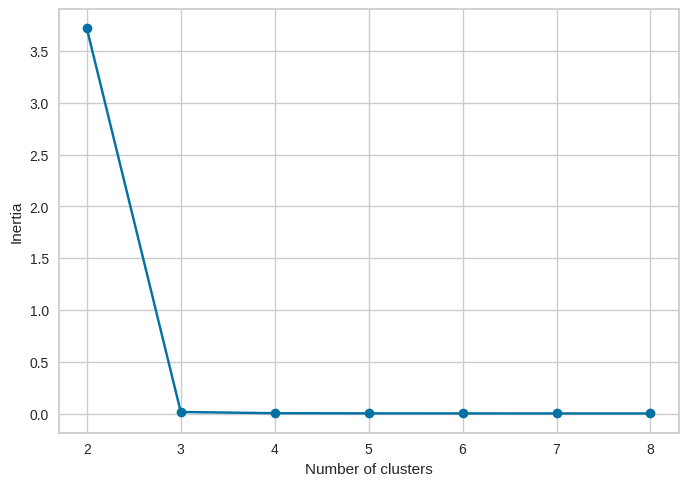

In [ ]:
inertia = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:

for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, silhouette={score:.3f}")

k=2, silhouette=0.823
k=3, silhouette=0.977
k=4, silhouette=0.783
k=5, silhouette=0.762
k=6, silhouette=0.592
k=7, silhouette=0.492
k=8, silhouette=0.436


In [ ]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)

rfm["Cluster"] = kmeans.fit_predict(X)

In [ ]:
cluster_profile = (
    rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]]
    .mean()
    .sort_values("Monetary", ascending=False)
)

cluster_profile


,Recency,Frequency,Monetary
Cluster,,,
2,1.0,24549.333333,5177250.0
1,1.0,6137.400000,1298784.0
0,1.0,1534.416667,326725.0


In [ ]:
segment_map = {
    2: "Champions",
    1: "Loyal",
    0: "At Risk",

}

rfm["Segment"] = rfm["Cluster"].map(segment_map)


In [ ]:
rfm["Segment"].value_counts()


,count
Segment,
At Risk,12
Loyal,5
Champions,3


In [ ]:
rfm_named = rfm.merge(
    df_user[["user_id", "user_name"]],
    on="user_id",
    how="left"
)


In [ ]:
rfm_named.groupby("Segment")["user_name"].apply(list)


,user_name
Segment,
At Risk,"[PT Mart Jaya, PT Travel Nusantara, CV Mart In..."
Champions,"[CV Land Sejahtera, PT Dana Nusantara, CV Wisa..."
Loyal,"[PT Konektivitas Indo, PT Karya Sejahtera, PT ..."


In [ ]:
segment_users = (
    rfm_named.groupby("Segment")["user_name"]
    .apply(lambda x: ", ".join(x))
    .reset_index(name="Users")
)


In [ ]:
rfm_named[[
    "user_name",
    "Recency",
    "Frequency",
    "Monetary",
    "Segment"
]].sort_values("Segment")


,user_name,Recency,Frequency,Monetary,Segment
9,CV Jalan Mandiri,1,1573,344080,At Risk
12,CV Hotel Jaya,1,1554,342240,At Risk
10,CV Niaga Indo,1,1552,336210,At Risk
8,PT Karya Jaya,1,1510,315770,At Risk
7,PT Estate Sejahtera,1,1593,339010,At Risk
6,PT Edu Mandiri,1,1488,318840,At Risk
19,PT Citra Global,1,1519,317510,At Risk
4,PT Saham Global,1,1530,335960,At Risk
3,CV Mart Indo,1,1487,300770,At Risk
2,PT Travel Nusantara,1,1559,340730,At Risk
